In [1]:
# installed pandas, matplotlib , numpy , scikit-learn

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

Reading the dataset from exams.csv file

In [38]:
mainFile = pd.read_csv("exams.csv")
mainFile.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
0,male,group B,bachelor's degree,standard,none,76,78,77
1,female,group E,associate's degree,free/reduced,none,86,95,93
2,male,group E,some high school,standard,none,67,51,49
3,female,group E,associate's degree,standard,none,72,80,74
4,female,group A,some high school,standard,none,54,67,61
5,male,group C,bachelor's degree,standard,none,78,77,72
6,female,group D,bachelor's degree,standard,none,62,78,81
7,male,group D,master's degree,free/reduced,completed,69,71,74
8,male,group B,some high school,free/reduced,none,60,55,53
9,male,group C,some college,standard,completed,71,74,73


Exploration of Data --> Creating and ploting Graphs

In [37]:
sampleFile = mainFile[['mathscore','readingscore','writingscore']]
sampleFile.head(10)

,mathscore,readingscore,writingscore
0,76,78,77
1,86,95,93
2,67,51,49
3,72,80,74
4,54,67,61
5,78,77,72
6,62,78,81
7,69,71,74
8,60,55,53
9,71,74,73


Creating a Bargraph of the following sampleFile data set

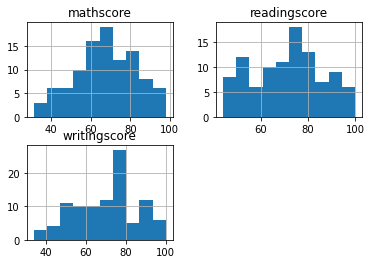

In [24]:
barGraphFile = sampleFile
barGraphFile.hist()
plt.show()

Creating a X-Y plane ploting of the features taking two at a time

First creating of Readingscore and Mathscore

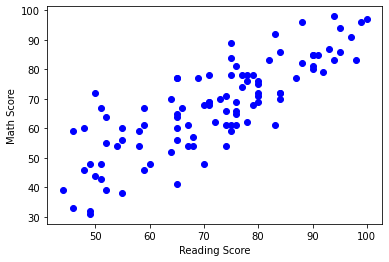

In [25]:
plt.scatter(sampleFile.readingscore,sampleFile.mathscore,color='blue')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

Creating for Writingscore and Mathscore

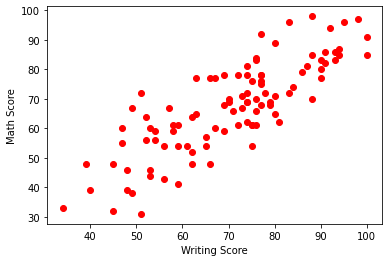

In [27]:
plt.scatter(sampleFile.writingscore,sampleFile.mathscore,color='red')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.show()

Dividing the data into train and test part. for this we create a mask

In [29]:
msk = np.random.rand(len(mainFile)) < 0.8
train = sampleFile[msk]
test = sampleFile[~msk]

SIMPLE REGRESSSION MODLE

Train data distribution

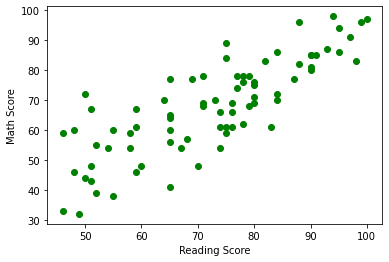

In [34]:
plt.scatter(train.readingscore,train.mathscore,color='green')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

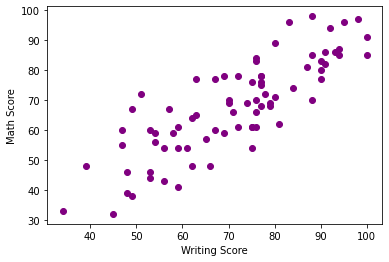

In [36]:
plt.scatter(train.writingscore,train.mathscore,color='purple')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.show()

Modeling By using sklearn library

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

now we put the training data part of reading and math score as an array into two variables using numpy and then put in regression

In [51]:
train_X = np.asanyarray(train[['readingscore']])
train_Y = np.asanyarray(train[['mathscore']])
regr.fit(train_X,train_Y)

LinearRegression()

printing the coefficients

In [57]:
print('Coefficient= ',regr.coef_)
print('Intercept= ',regr.intercept_)

Coefficient=  [[0.86994881]]
Intercept=  [4.87024191]


Ploting the line of regression on the training data set graph of reading and math score

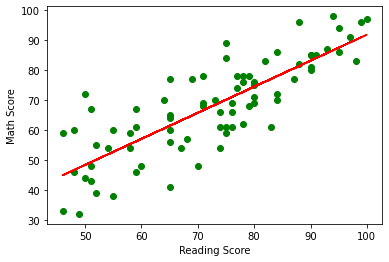

In [61]:
plt.scatter(train.readingscore,train.mathscore,color='green')
plt.plot(train_X,regr.coef_*train_X+regr.intercept_,'-r')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

Plotting line of regression for writing and math score training data set

In [64]:
train_Z = np.asanyarray(train[['writingscore']])
regr.fit(train_Z,train_Y)

LinearRegression()

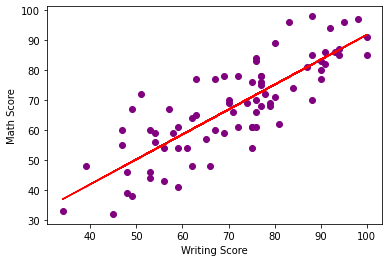

In [67]:
plt.scatter(train.writingscore,train.mathscore,color='purple')
plt.plot(train_Z,regr.coef_*train_Z+regr.intercept_,'-r')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.show()

Evaluating the accuracy of the regression

In [68]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['readingscore']])
test_y = np.asanyarray(test[['mathscore']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.76
Residual sum of squares (MSE): 68.84
R2-score: 0.66


In [69]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['writingscore']])
test_y = np.asanyarray(test[['mathscore']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.85
Residual sum of squares (MSE): 77.30
R2-score: 0.62
